In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn
from datetime import datetime
plt.rcParams["figure.figsize"] = [17, 7]

In [2]:
data_dir = 'Trace_files'
fnames = [x for x in filter(lambda x: x.endswith('.txt'), os.listdir(os.path.join('.', data_dir)))]
workload_names = [ x for x in map(lambda x: x.split('_')[1].split('.')[0], fnames) ]

In [3]:
# a dict of dataframes, tread (index) lightly..
dataset = {fname.split('_')[1].split('.')[0]:pd.read_csv(os.path.join(data_dir, fname), delimiter='\s+', header = None, dtype = float) for fname in fnames}

In [8]:
file_lengths = {x:dataset[x].shape[0] for x in workload_names}

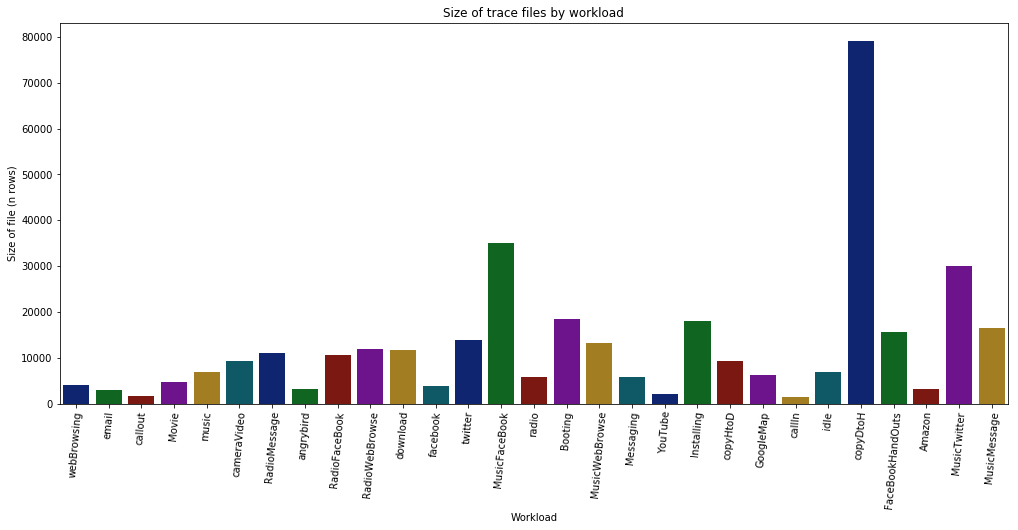

In [14]:
axes = seaborn.barplot(list(file_lengths.keys()), list(file_lengths.values()), palette='dark')
for item in axes.get_xticklabels():
    item.set_rotation(85)
plt.title("Size of trace files by workload")
plt.xlabel('Workload')
plt.ylabel('Size of file (n rows)')
plt.show()